# Star Wars Survey

## Import Libraries and Read in Data into DataFrame

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

star_wars = pd.read_csv('Data/star_wars.csv', encoding = 'ISO-8859-1')
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific

## Data Inspection

In [2]:
# List column names
for i in star_wars.columns:
    print(i)

RespondentID
Have you seen any of the 6 films in the Star Wars franchise?
Do you consider yourself to be a fan of the Star Wars film franchise?
Which of the following Star Wars films have you seen? Please select all that apply.
Unnamed: 4
Unnamed: 5
Unnamed: 6
Unnamed: 7
Unnamed: 8
Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.
Unnamed: 10
Unnamed: 11
Unnamed: 12
Unnamed: 13
Unnamed: 14
Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.
Unnamed: 16
Unnamed: 17
Unnamed: 18
Unnamed: 19
Unnamed: 20
Unnamed: 21
Unnamed: 22
Unnamed: 23
Unnamed: 24
Unnamed: 25
Unnamed: 26
Unnamed: 27
Unnamed: 28
Which character shot first?
Are you familiar with the Expanded Universe?
Do you consider yourself to be a fan of the Expanded Universe?
Do you consider yourself to be a fan of the Star Trek franchise?
Gender
Age
Household Income
Education
Location 

In [3]:
# Data Dimension
star_wars.shape

(1186, 38)

## Cleaning and Mapping Yes/No Columns

We will clean the following two columns to contain _True/False_ values from _Yes/No_ values.

* `Have you seen any of the 6 films in the Star Wars franchise?`

* `Do you consider yourself to be a fan of the Star Wars film franchise?`

We will begin by viewing the unique values from the above mentioned columns.

In [4]:
# Inspect unique values for "Have you seen any of the 6 films in the start Wars franchise" column
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].unique()

array(['Yes', 'No'], dtype=object)

In [5]:
# Inspect unique values for "Do you consider yourself to be a fan of the Star Wars film franchise?" column
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].unique()

array(['Yes', nan, 'No'], dtype=object)

We can see that these first column has two unique values; **Yes** and **No**, while the ssecond column has three unique values; **Yes**, **No** and **nan**. **nan** in the second column is a representatio of **Not a Number** or missing values. We will convert the values to boolean values: **Yes** into **True** and **No** into **False**, **nan** values will remain as they are.

In [6]:
# Mapping dictionary
yes_no_map = {'Yes': True, 'No': False}

# Change the values
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = \
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no_map)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = \
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no_map)

# Display unique values to verify success of changes we made
print(star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].unique(),\
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].unique(), sep = '\n')

[ True False]
[True nan False]


## Cleaning and Mapping Checkbox Columns

For this activity, the following columns will be cleaned by changing their column names and their respective values. These columns contains answers for whether the respondent has watched a mentioned movie or not. If the value is the name of the movie then the respondent has watched the movie, otherwise he has not watched the movie. We will convert the values to contain **True* values for "Yes I have watched the movie" and **False** for otherwise. 
                                                                                                                                            
These are the columns we will be dealing with:
                                                                                                                                                        
* `Which of the following Star Wars films have you seen? Please select all that apply`. — whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
    
* `Unnamed: 4` — whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
* `Unnamed: 5` — whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
* `Unnamed: 6` — whether or not the respondent saw Star Wars: Episode IV A New Hope.
* `Unnamed: 7` — whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
* `Unnamed: 8` — whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.

We will first clean the column names but before we start cleaning the names we will have to view the contents of one column which will giude us how we can go about naming our columns.

In [7]:
# Unique values for "Which of the following Star Wars films have you seen? Please select all that apply."
star_wars['Which of the following Star Wars films have you seen? Please select all that apply.'].unique()

array(['Star Wars: Episode I  The Phantom Menace', nan], dtype=object)

The columns contains the name of the movie and **nan** values. We name our columns as **seen_1**, **seen_2**, **seen_3**, **seen_4**, **seen_5** and **seen_6** respectively.

In [8]:
# Column names mapping
column_names = {'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1', \
                'Unnamed: 4': 'seen_2', 'Unnamed: 5': 'seen_3', 'Unnamed: 6': 'seen_4', 'Unnamed: 7': 'seen_5', 'Unnamed: 8': 'seen_6'}
star_wars.rename(columns = column_names, inplace = True)

We have successfully cleaned the said column names. Let us now clean the values, but first, we will view the unique values for each of the above **6** cleaned columns.

In [9]:
cols_list = ['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6']
for col in cols_list:
    unique_values = star_wars[col].unique()
    print(unique_values)

['Star Wars: Episode I  The Phantom Menace' nan]
['Star Wars: Episode II  Attack of the Clones' nan]
['Star Wars: Episode III  Revenge of the Sith' nan]
['Star Wars: Episode IV  A New Hope' nan]
['Star Wars: Episode V The Empire Strikes Back' nan]
['Star Wars: Episode VI Return of the Jedi' nan]


We will use this output to create mappings for cleaning values.

In [10]:
# mappings
mappings_list = [{'Star Wars: Episode I  The Phantom Menace':True, np.nan: False},\
{'Star Wars: Episode II  Attack of the Clones': True, np.nan: False},\
{'Star Wars: Episode III  Revenge of the Sith': True, np.nan: False},\
{'Star Wars: Episode IV  A New Hope': True, np.nan: False},\
{'Star Wars: Episode V The Empire Strikes Back': True, np.nan: False},\
{'Star Wars: Episode VI Return of the Jedi': True, np.nan: False}]

# Change column values using the mappings
for col, map in zip(cols_list, mappings_list):
    star_wars[col] = star_wars[col].map(map)

# Display the new unique values
for i in cols_list:
    print(star_wars[i].unique())

[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]


We have successfully cleaned the **Checkbox** columns.

## Cleaning the Ranking Columns

In this section we will be cleaning **ranking** columns which contains data on how respondents ranked the movies. A rank of **1** is the best and the worst is a rank of **6**, a **nan** ranking means the respondent did respond to that question. The values in these columns are represented as **strings** or **objects**, our task is to convert them to numeric values and to convert column names to the ones we can easily recognise and interpret.

We will be dealing with the following columns:

* `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.` - How much the respondent liked Star Wars: **Episode I The Phantom Menace**
* `Unnamed: 10` — How much the respondent liked Star Wars: **Episode II Attack of the Clones**
* `Unnamed: 11` — How much the respondent liked Star Wars: **Episode III Revenge of the Sith**
* `Unnamed: 12` — How much the respondent liked Star Wars: **Episode IV A New Hope**
* `Unnamed: 13` — How much the respondent liked Star Wars: **Episode V The Empire Strikes Back**
* `Unnamed: 14` — How much the respondent liked Star Wars: **Episode VI Return of the Jedi**

We will first change the column names to **ranking_1**, **ranking_2**, **ranking_3**, **ranking_4**, **ranking_5** and **ranking_6** respectively.

In [11]:
# A list of new column names
new_column_names = ['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6']

# Channge column names
for new_col, old_col in zip(new_column_names, star_wars.columns[9:15]):
    star_wars.rename(columns = {old_col: new_col}, inplace = True)
    
# Display the new column names
for i in star_wars.columns[9:15]:
    print(i)    

ranking_1
ranking_2
ranking_3
ranking_4
ranking_5
ranking_6


We have successfully changed **Ranking** column names. Let us now change the **Datatypes** of these columns from object to **Floating Point** dtypes.

In [12]:
# Change data type
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype('float')

# Display the new data types
star_wars[star_wars.columns[9:15]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ranking_1  835 non-null    float64
 1   ranking_2  836 non-null    float64
 2   ranking_3  835 non-null    float64
 3   ranking_4  836 non-null    float64
 4   ranking_5  836 non-null    float64
 5   ranking_6  836 non-null    float64
dtypes: float64(6)
memory usage: 55.7 KB


## Finding the Highest-Ranked Movie

Now that we have succefully cleaned the ranking columns, we can easily find the highest ranked movie. We can achieve this by calculating the mean rank of every ranking column we have. The column with the lowest **mean** is the column representing the **Highest Ranked Movie**.

In [13]:
for col in star_wars.columns[9:15]:
    print(f"The Mean for {col} column is {star_wars[col].mean()}.")

The Mean for ranking_1 column is 3.7329341317365268.
The Mean for ranking_2 column is 4.087320574162679.
The Mean for ranking_3 column is 4.341317365269461.
The Mean for ranking_4 column is 3.272727272727273.
The Mean for ranking_5 column is 2.513157894736842.
The Mean for ranking_6 column is 3.047846889952153.


Column **ranking_5** is the column with the heighest ranking. This column represent **Star Wars: Episode V The Empire Strikes Back**.

We can as well plot the rankings for each ranking column. We will display all the ranking in a single **figure** below:

In [14]:
ranking_dict = {}
for col in star_wars.columns[9:15]:
    ranking_dict[col+'_count'] = star_wars[col].value_counts().reset_index()
print(ranking_dict['ranking_1_count'])

   ranking_1  count
0        4.0    237
1        6.0    168
2        3.0    130
3        1.0    129
4        5.0    100
5        2.0     71


## Finding the Most Viewed Movie

In [15]:
seen_columns = [col for col in star_wars.columns if re.search(r"seen_[1-6]", col)]
for col in seen_columns:
    print(f"The number of views for {col} column is {star_wars[col].sum()}")

The number of views for seen_1 column is 673
The number of views for seen_2 column is 571
The number of views for seen_3 column is 550
The number of views for seen_4 column is 607
The number of views for seen_5 column is 758
The number of views for seen_6 column is 738


In [16]:
seen_df = star_wars[seen_columns]
seen_sums = seen_df.sum()
print(seen_sums)

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64


The **seen** column with the heighest number of views is **seen_5** representing the same movies that is highly **ranked** - **Star Wars: Episode V The Empire Strikes back**.

Let us plot our findings next:

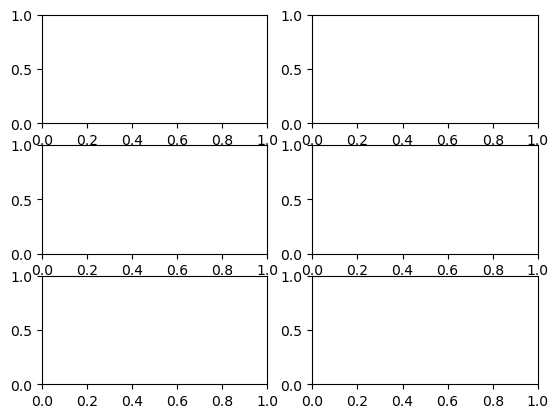

In [17]:
fig, axes = plt.subplots(3, 2)
plt.show()

##  Exploring the Data by Binary Segments

Let us now devide our data into two DataFrames by gender. This will enable be able find which movies are popular by gender. Before dividing our data by gender, let us view the unique values in the `Gender` to check in how how many DataFrames we are going to divide our data into, which will be determined by how many gender are represented in our dataset.

In [18]:
star_wars['Gender'].unique()

array(['Male', nan, 'Female'], dtype=object)

In [19]:
male_df = star_wars[star_wars['Gender'] == 'Male']
female_df = star_wars[star_wars['Gender'] == 'Female']

In [20]:
ranks = star_wars['ranking_1'].value_counts().reset_index()
ranks

,ranking_1,count
0,4.0,237
1,6.0,168
2,3.0,130
3,1.0,129
4,5.0,100
5,2.0,71


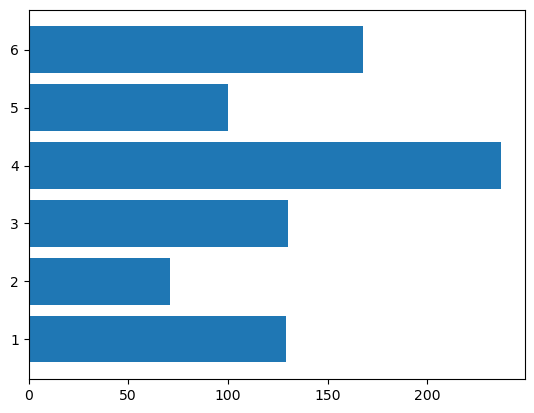

In [21]:
plt.barh(width = ranks['count'], y = ranks['ranking_1'])
plt.show()